# Decission tree algo implementation
## 1) DecissionTreeClassifier

In [1]:
from sklearn.datasets import load_iris
x,y=load_iris(return_X_y=True, as_frame=True)

In [2]:
x

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [3]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

In [4]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=10)

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

[Text(0.3076923076923077, 0.9285714285714286, 'x[3] <= 0.8\ngini = 0.665\nsamples = 120\nvalue = [40, 37, 43]'),
 Text(0.23076923076923078, 0.7857142857142857, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.38461538461538464, 0.7857142857142857, 'x[2] <= 4.75\ngini = 0.497\nsamples = 80\nvalue = [0, 37, 43]'),
 Text(0.15384615384615385, 0.6428571428571429, 'x[3] <= 1.65\ngini = 0.057\nsamples = 34\nvalue = [0, 33, 1]'),
 Text(0.07692307692307693, 0.5, 'gini = 0.0\nsamples = 33\nvalue = [0, 33, 0]'),
 Text(0.23076923076923078, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6153846153846154, 0.6428571428571429, 'x[3] <= 1.75\ngini = 0.159\nsamples = 46\nvalue = [0, 4, 42]'),
 Text(0.38461538461538464, 0.5, 'x[1] <= 2.65\ngini = 0.49\nsamples = 7\nvalue = [0, 3, 4]'),
 Text(0.3076923076923077, 0.35714285714285715, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.46153846153846156, 0.35714285714285715, 'x[2] <= 5.05\ngini = 0.48\nsamples = 5\nvalue = [0, 3, 2]'

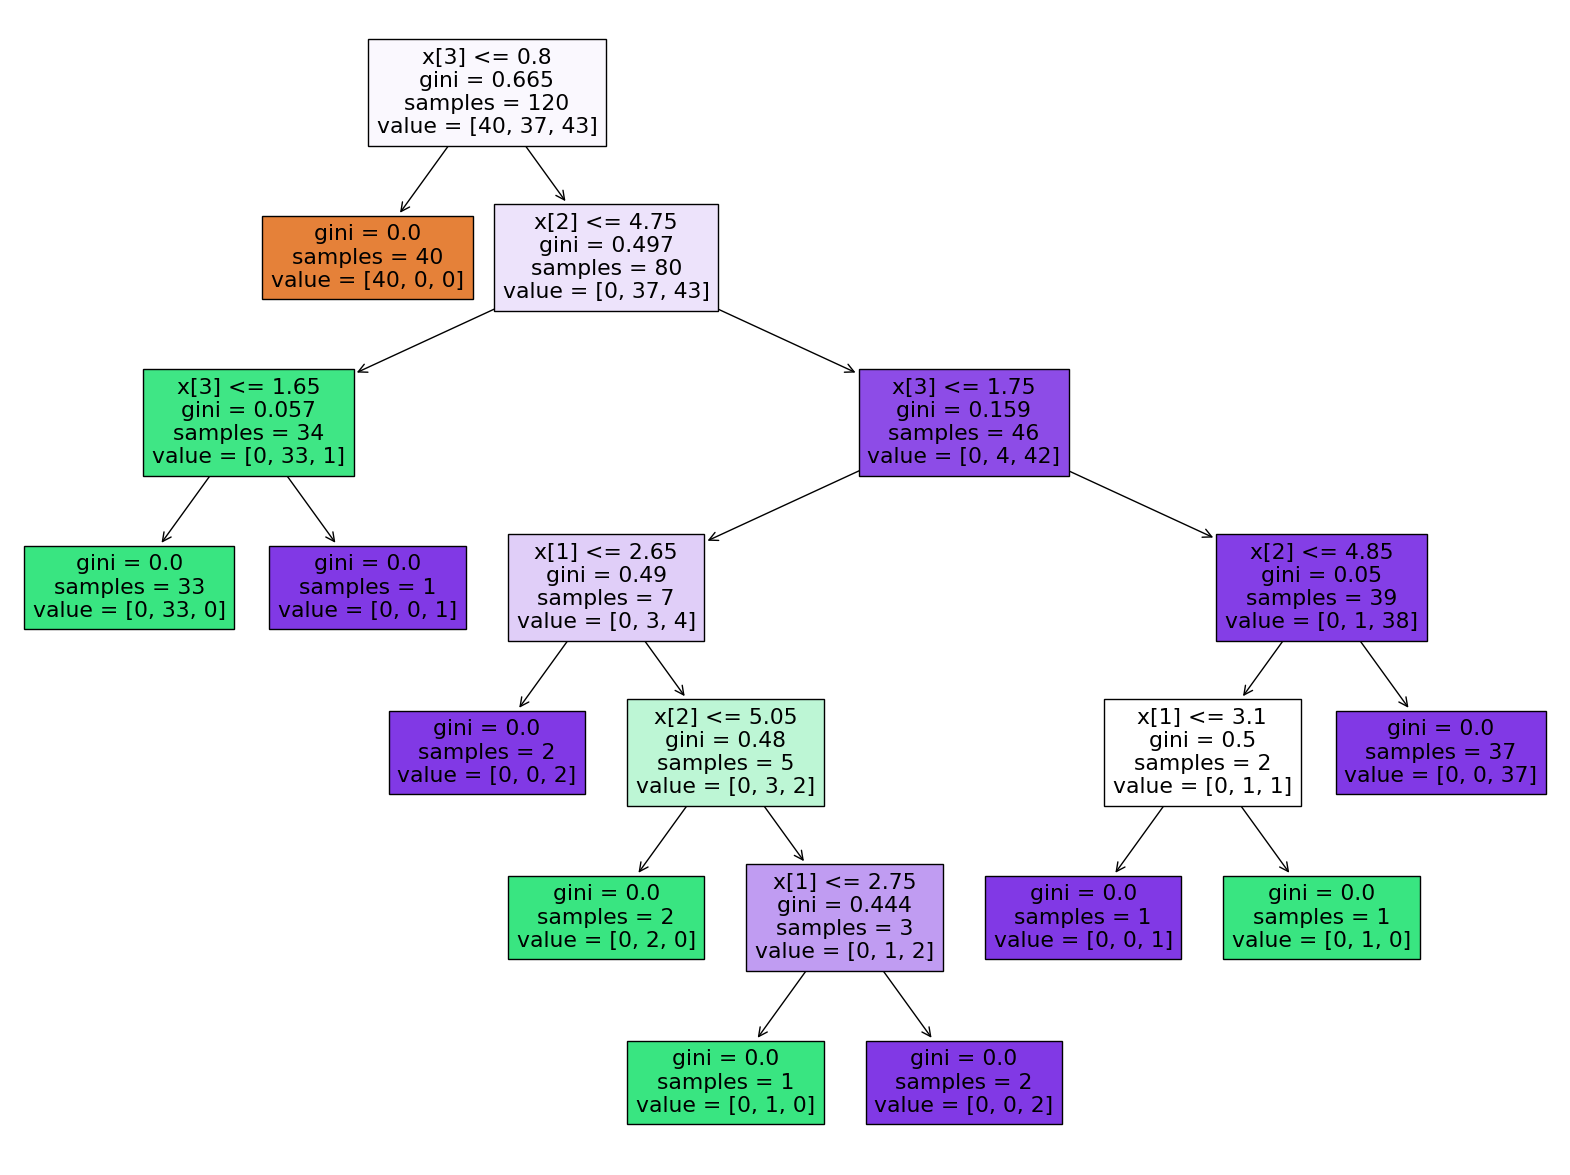

In [9]:
from sklearn import  tree
import matplotlib.pyplot as plt
plt.figure(figsize=(20,15))
tree.plot_tree(model,filled=True)

# post prunning (tuning hyperparameters after model tarinning and checking tree to overcome overfitting)

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
model=DecisionTreeClassifier(max_depth=2)
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2)

[Text(0.4, 0.8333333333333334, 'x[3] <= 0.8\ngini = 0.665\nsamples = 120\nvalue = [40, 37, 43]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.6, 0.5, 'x[2] <= 4.75\ngini = 0.497\nsamples = 80\nvalue = [0, 37, 43]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.057\nsamples = 34\nvalue = [0, 33, 1]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.159\nsamples = 46\nvalue = [0, 4, 42]')]

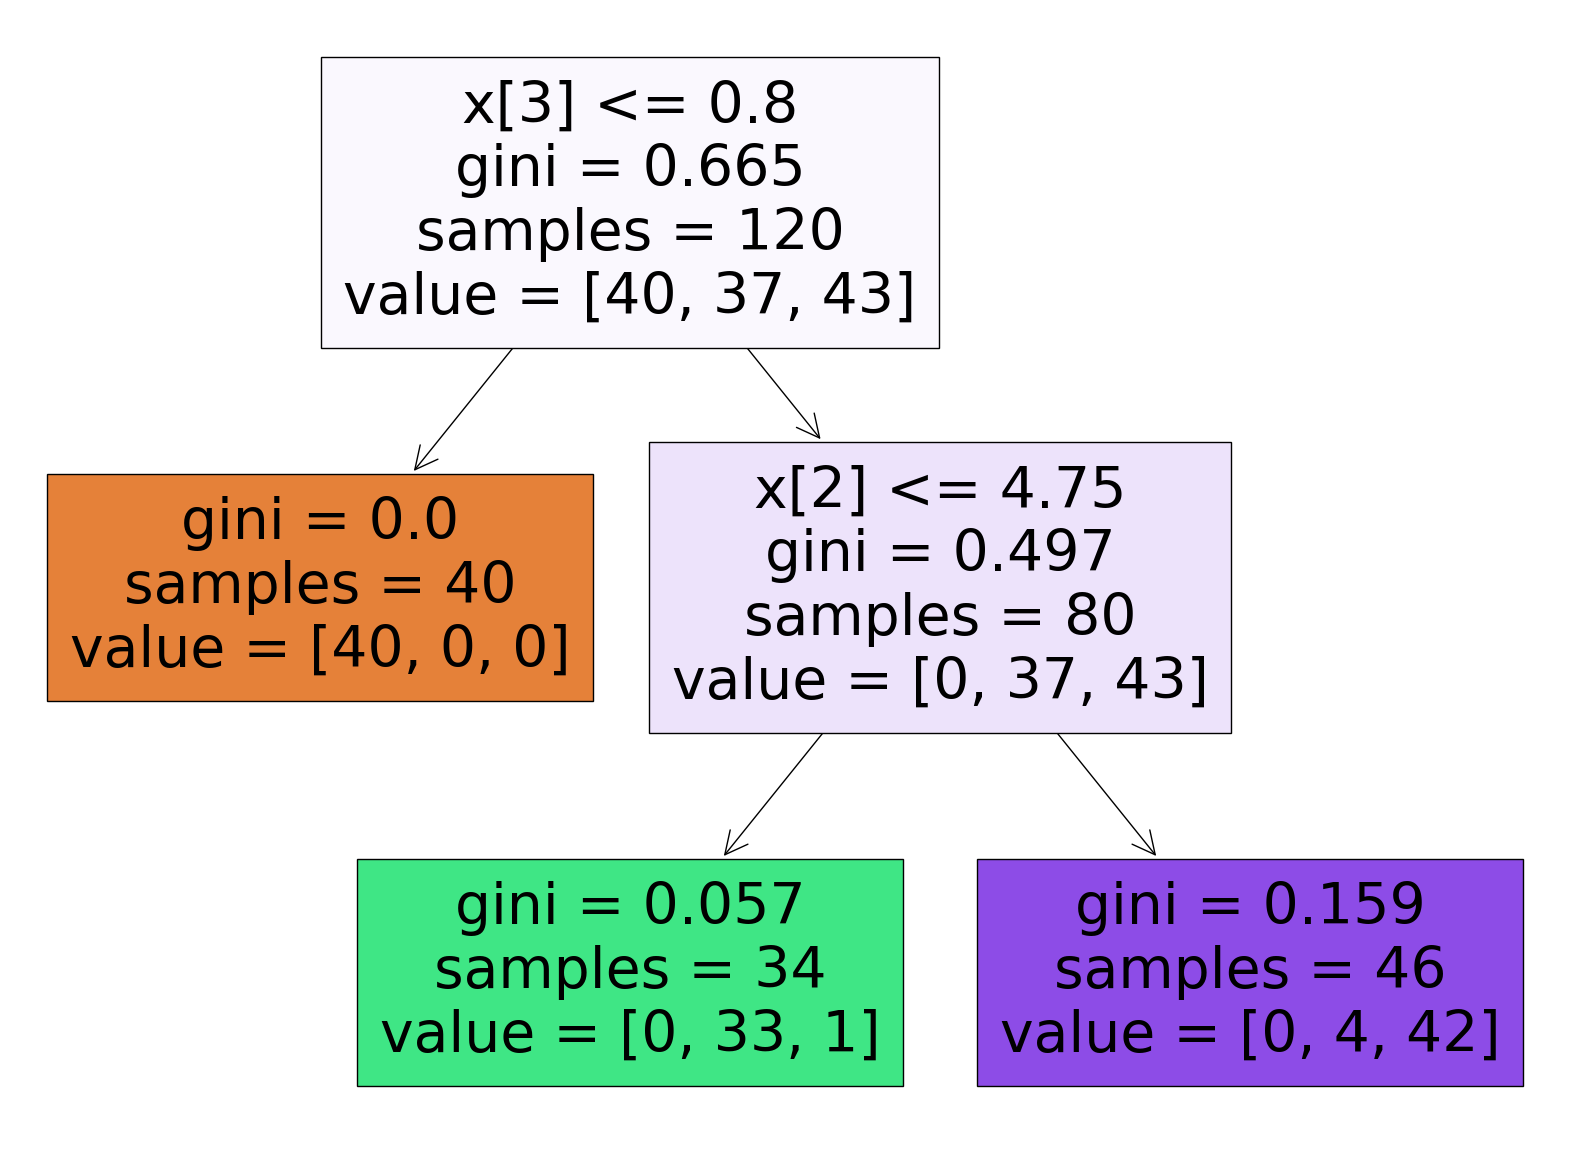

In [11]:
from sklearn import  tree
import matplotlib.pyplot as plt
plt.figure(figsize=(20,15))
tree.plot_tree(model,filled=True)

In [12]:
y_pred=model.predict(x_test)

In [13]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,classification_report,confusion_matrix,accuracy_score
print(mean_absolute_error(y_pred,y_test))
print(mean_squared_error(y_pred,y_test))
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))
print(accuracy_score(y_pred,y_test))

0.06666666666666667
0.06666666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.85      1.00      0.92        11
           2       1.00      0.78      0.88         9

    accuracy                           0.93        30
   macro avg       0.95      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30

[[10  0  0]
 [ 0 11  0]
 [ 0  2  7]]
0.9333333333333333


# pre prunning (tuning hyperparameters before model tarinning and checking tree to overcome overfitting)

In [16]:
params={'criterion':["gini", "entropy", "log_loss"],'max_depth':[2,3,4,5],'splitter':["best", "random"],
        'max_features' :["auto", "sqrt", "log2"]}

In [22]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
model=DecisionTreeClassifier()
grid=GridSearchCV(estimator=model,param_grid=params,scoring='accuracy',cv=5)
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [23]:
import pandas as pd
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002287,0.000393,0.001801,0.000401,gini,2,auto,best,"{'criterion': 'gini', 'max_depth': 2, 'max_fea...",0.916667,0.916667,0.958333,0.916667,0.958333,0.933333,0.020412,10
1,0.001702,0.000396,0.001205,0.000398,gini,2,auto,random,"{'criterion': 'gini', 'max_depth': 2, 'max_fea...",0.583333,0.500000,0.750000,0.791667,0.916667,0.708333,0.149071,70
2,0.001212,0.000402,0.001003,0.000632,gini,2,sqrt,best,"{'criterion': 'gini', 'max_depth': 2, 'max_fea...",0.916667,0.916667,1.000000,0.833333,0.958333,0.925000,0.055277,13
3,0.001411,0.000481,0.001203,0.000399,gini,2,sqrt,random,"{'criterion': 'gini', 'max_depth': 2, 'max_fea...",0.666667,0.875000,0.833333,0.708333,0.750000,0.766667,0.077280,64
4,0.001190,0.000634,0.001008,0.000003,gini,2,log2,best,"{'criterion': 'gini', 'max_depth': 2, 'max_fea...",0.875000,0.958333,0.958333,0.916667,0.958333,0.933333,0.033333,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,0.001598,0.000797,0.001306,0.000400,log_loss,5,auto,random,"{'criterion': 'log_loss', 'max_depth': 5, 'max...",0.875000,0.875000,0.833333,0.666667,0.875000,0.825000,0.080795,57
68,0.001205,0.000400,0.000899,0.000201,log_loss,5,sqrt,best,"{'criterion': 'log_loss', 'max_depth': 5, 'max...",0.958333,0.916667,0.958333,0.833333,0.958333,0.925000,0.048591,13
69,0.001227,0.000393,0.001001,0.000002,log_loss,5,sqrt,random,"{'criterion': 'log_loss', 'max_depth': 5, 'max...",0.833333,0.875000,0.958333,0.958333,0.958333,0.916667,0.052705,18
70,0.001203,0.000399,0.001259,0.000388,log_loss,5,log2,best,"{'criterion': 'log_loss', 'max_depth': 5, 'max...",0.875000,0.916667,0.958333,0.708333,0.958333,0.883333,0.092796,44


In [24]:
grid.best_score_

0.95

In [25]:
grid.best_params_

{'criterion': 'log_loss',
 'max_depth': 4,
 'max_features': 'log2',
 'splitter': 'best'}

In [29]:
y_pred=grid.predict(x_test)

In [30]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print(mean_absolute_error(y_pred,y_test))
print(mean_squared_error(y_pred,y_test))
print(r2_score(y_pred,y_test)*100)
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))
print(accuracy_score(y_pred,y_test))

0.0
0.0
100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         7

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[10  0  0]
 [ 0 13  0]
 [ 0  0  7]]
1.0


# 1) DecissionTreeRegressor

In [36]:
from sklearn.datasets import load_diabetes
#x,y=load_iris(return_X_y=True, as_frame=True)
data=load_diabetes()

In [37]:
data.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [40]:
data.target

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [63]:
x=pd.DataFrame(data.data,columns=data.feature_names)
y=pd.DataFrame(data.target,columns=['target'])

In [64]:
x.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [65]:
y.head()

,target
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0


In [66]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=10)

In [67]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
model=DecisionTreeRegressor()
#grid=GridSearchCV(estimator=model,param_grid=params,scoring='accuracy',cv=5)
model.fit(x_train,y_train)

DecisionTreeRegressor()

In [68]:
y_pred=model.predict(x_test)

In [69]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print(mean_absolute_error(y_pred,y_test))
print(mean_squared_error(y_pred,y_test))
print(r2_score(y_pred,y_test))
print(accuracy_score(y_pred,y_test))

67.56390977443608
7710.270676691729
-0.25596673853066254
0.0


# pre prunning (tuning hyperparameters before model tarinning and checking tree to overcome overfitting)

In [57]:
params={'criterion':["squared_error", "friedman_mse", "absolute_error","poisson"],'max_depth':[2,3,4,5,10,15,20,25],'splitter':["best", "random"],
        'max_features' :["auto", "sqrt", "log2"]}

In [70]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
model=DecisionTreeRegressor()
grid=GridSearchCV(estimator=model,param_grid=params,scoring='neg_mean_squared_error',cv=5)
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [2, 3, 4, 5, 10, 15, 20, 25],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [71]:
grid.best_params_

{'criterion': 'squared_error',
 'max_depth': 3,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [72]:
grid.best_score_

-3846.187094097081

In [73]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print(mean_absolute_error(y_pred,y_test))
print(mean_squared_error(y_pred,y_test))
print(r2_score(y_pred,y_test))
print(accuracy_score(y_pred,y_test))

67.56390977443608
7710.270676691729
-0.25596673853066254
0.0
